In [16]:
import pandas as pd
import joblib

# Load your CSV
df = pd.read_csv("data_darah_2020_2025.csv")

# Convert date to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Optional: Extract useful features from date
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Weekday'] = df['Date'].dt.weekday

# Drop unneeded columns
df = df.drop(columns=['Date', 'Hospital'])  # Or keep Hospital if you encode it later


C:\Users\USER\AppData\Local\Temp\ipykernel_23676\3301403681.py:8: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])


In [17]:
from sklearn.preprocessing import LabelEncoder

# Encode State column if needed
df['State'] = LabelEncoder().fit_transform(df['State'])


In [18]:
# Target variable
y = df['Daily']

# Drop target and keep other features
X = df.drop(columns=['Daily'])


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


MSE: 3.109864925201379
R2 Score: 0.9997955769331517


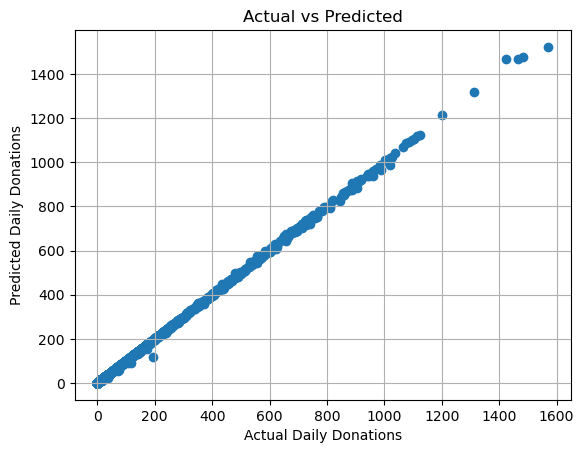

In [21]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Daily Donations")
plt.ylabel("Predicted Daily Donations")
plt.title("Actual vs Predicted")
plt.grid(True)
plt.show()


In [22]:
# Save the model to a file
joblib.dump(model, 'donation_model.pkl')


['donation_model.pkl']